In [1]:
import tweepy # accesses Twitter API
from textblob import TextBlob as tb 
from matplotlib import pyplot as plt
import nltk
import pandas as pd
import csv
import re

In [2]:
# register for Twitter API
consumer_key = 'rrRcx9wOePovLRPgt38lHMbrt'
consumer_secret = 'K0mUuJY91RZMN4CDeTKnSBOTma6wbiSkCgrnMISCobrUWXvUYo'

access_token = '924790956154597377-UYAoe05QgIDAft2Y4r0He1wX1qeaIMS'
access_token_secret = 'neFsA0vzOjnzW6krjhS3Dq23tlwCxPCkhlDDDxJcgJ7uU'


In [3]:
# Get recent tweets with keyword 'Emirates NBD'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

count = 1000
public_tweets = api.search(q = "Emirates NBD", count = count)

data = []*count
data.append(['user', 'user location', 'user created at', 'tweet text', 'tweet created at'])
for tweet in public_tweets:
    data.append([tweet.user.screen_name, tweet.user.location, tweet.user.created_at, tweet.text, tweet.created_at])
    
#save to csv file
with open("tweetsDB.csv", "wt") as fout:
    csvout = csv.writer(fout)
    csvout.writerows(data)

#read csv into dataframe
df = pd.read_csv('tweetsDB.csv')   
df = df.fillna("")

In [4]:
# remove non alphabetical symbols
def clean(text):
    words = [re.sub("https", " ", word) 
             for word in nltk.word_tokenize(str(text)) if word.isalpha()]
    return  " ".join(words) 

df["tweet text"] = df["tweet text"].map(clean)
df["user location"] = df["user location"].map(clean)

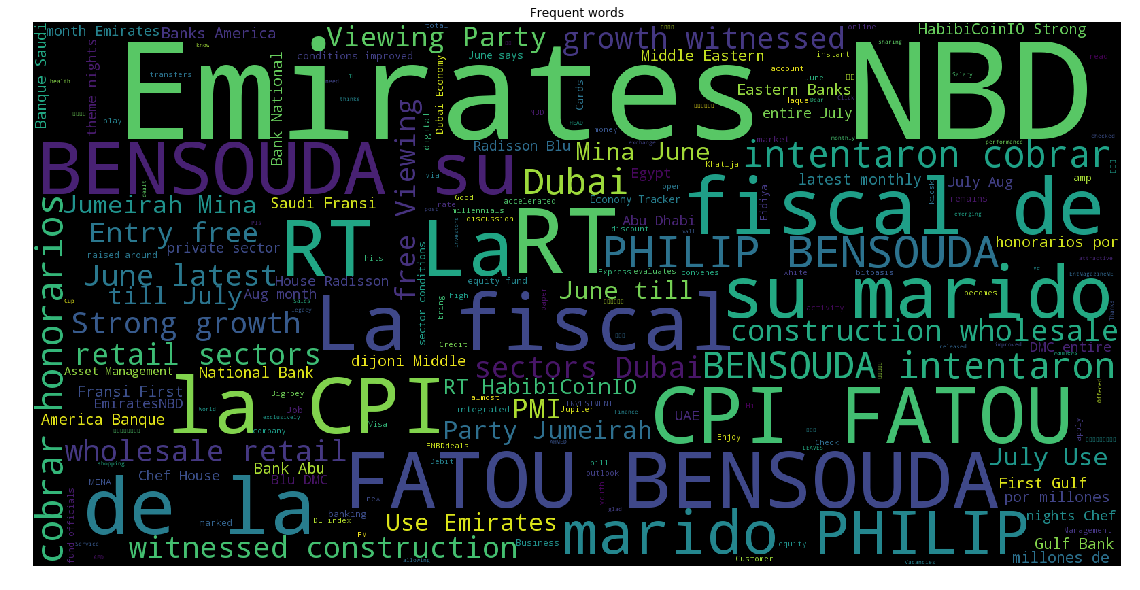

In [5]:
words = " ".join(df['tweet text'].values.tolist())

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords = stopwords,  
                          max_words=200,
                          max_font_size=200, 
                          random_state=42
                         ).generate(words)
#print(wordcloud)
fig = plt.figure(figsize = (20,10))
plt.imshow(wordcloud)
plt.title("Frequent words")
plt.axis("off")
plt.show()


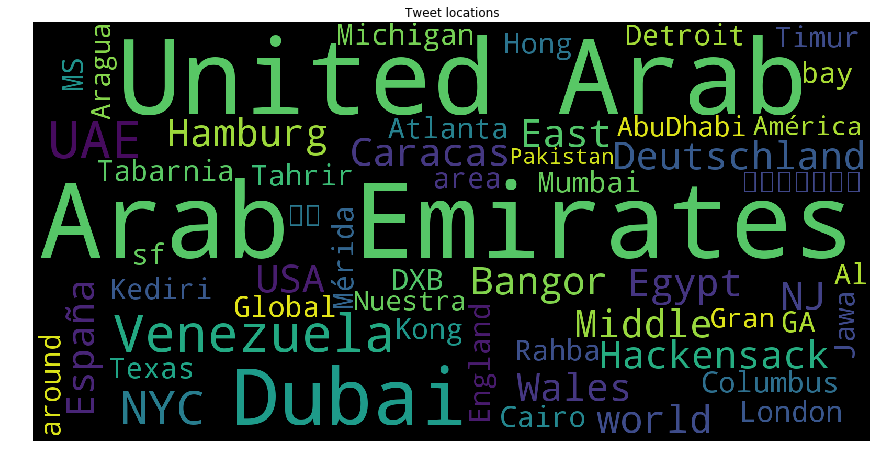

In [6]:
locations = " ".join(df['user location'].values.tolist())

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords = stopwords,  
                          max_words=200,
                          max_font_size=200, 
                          random_state=42
                         ).generate(locations)
#print(wordcloud)
fig = plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.title("Tweet locations")
plt.axis("off")
plt.show()

In [7]:
polarity = lambda x : tb(x).sentiment.polarity
subjectivity = lambda x : tb(x).sentiment.subjectivity

df["polarity"] = df["tweet text"].map(polarity)
df["subjectivity"] = df["tweet text"].map(subjectivity)
df["sentiment_index"] = list(zip(df.subjectivity.values, df.polarity.values))

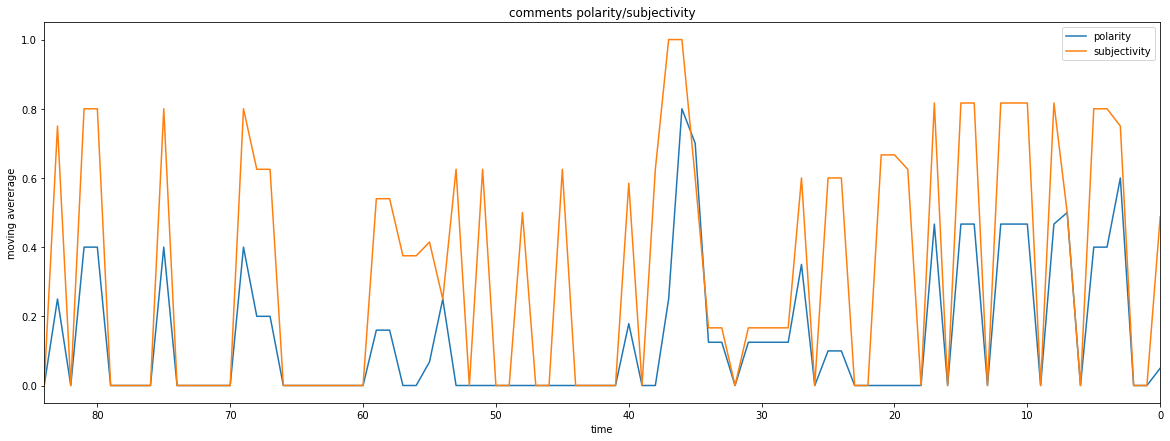

In [8]:
x = df[["polarity", "subjectivity"]]
X = pd.DataFrame.rolling(x,window = 1).mean()[::-1]
X.plot(figsize = (20,7))
plt.title("comments polarity/subjectivity")
plt.xlabel("time")
plt.ylabel("moving avererage")
plt.show()